# Predicting the effect of a sub-lithospheric layer on the partitioning of surface motion

Sub-lithospheric layer width and viscosity parameters significantly affect trench and plate velocities.

Computation simulations involving large and sharp variation in the physical properties of the material modelled are extremely computationally expensive and require several months or even years to run to completion.
![alt](../img/SLL3D.png) 

<a name="toc_15456_3"></a>
# Scikit-Learn for Linear Regression With Multiple Variables (MLR) & Predictions

MLR refers to a statistical technique that uses two or more independent variables to predict the outcome of a dependent variable. The technique enables analysts to determine the variation of the model and the relative contribution of each independent variable in the total variance. In other words Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables

## Goals:

 This notebook preditct trence and plate ratio for a given value of viscosity and width of SLL.
    
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`


In [1]:
# Import Libraries
import numpy as np
import math, copy
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.style.use('./deeplearning.mplstyle')
from lab_utils_multi import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Trench and Plate velocities obtained from 3D simulations
# Magnitude of plate velocity
Vp_mag = np.array([
         4.6999851528309344,
         4.2751480911622135,
         3.6497913944973508,
         3.2736974878749741,
         6.4611815337388379,
         5.3561187289356731,
         4.5125663357343422,
         3.6241665283346278])
# Trench migration rate
Vt     = np.array([
        -0.11995725,
        -0.36236586,
        -0.66254439,
        -0.96785037,
         0.99889706,
         0.3911321 ,
        -0.15118985,
        -0.78003195])
# Subduction Partitioning
Subpart = Vt/Vp_mag

# Compute features. 
km        = 1e3;

# Mantle viscosity
etaMantle = np.array([ 
            2.50000000e+21,   2.50000000e+21,
            2.50000000e+21,   2.50000000e+21,           
            2.50000000e+21,   2.50000000e+21,  
            2.50000000e+21,   2.50000000e+21])
# Sub-lithospheric layer viscosity
etaSLL    = np.array([  
                  
            2.50000000e+20, 2.50000000e+20, 
            2.50000000e+20,2.50000000e+20,
            2.500000000e+19,   2.500000000e+19,
            2.500000000e+19,   2.500000000e+19,])
# Oceanic plate width
widthOP   = np.array([   
                  3000.*km,   3000.*km,
                  3000.*km,   3000.*km,  
                  
                  3000.*km,3000.*km,   
                 3000.*km,3000.*km,   ])

# SLL width
widthSLL   = np.array([    
             3000*km,   2250*km,            
             1500.*km,   750.*km,               
             3000*km,   2250*km,
             1500.*km,   750.*km ])
# Viscosity ratio between SLL and mantle
eta_ratio  = etaSLL/etaMantle
# Width ration between SLL and oceanic plate
w_star     = widthSLL/widthOP

In [3]:
# Initialise the problem
x1_train = eta_ratio
x2_train = w_star
y_train  = Subpart
X_features = ['$\eta_{SLL}/\eta_{UM}$','$W^{*}$']
X_train = [] 
for i in range (len(x1_train)):

    X_train.append([x1_train[i],x2_train[i]])
    
X_train = np.array(X_train)
m = y_train.shape[0]

In [4]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(f"Regression coeffients and intercept: w[0]: {regr.coef_[0]: 0.4e},w[1]: {regr.coef_[1]: 0.4e}, b: {regr.intercept_: 0.4e}")

Regression coeffients and intercept: w[0]: -1.5732e+00,w[1]:  4.2463e-01, b: -2.5494e-01


In [5]:
# Make a prediction for a hypothetical value of viscosity and width contrast
predictedVtVP = regr.predict([[0.001, 0.5]])
print("Predicted_VtVP:", predictedVtVP)

Predicted_VtVP: [-0.04419761]


In [6]:
# Sklearn's model.score(X,y) calculation is based on co-efficient of determination i.e R^2 that takes model.score= (X_test,y_test). 
regr.score(X_train, y_train)

#R2, which is how much more accurate your regression line is compared to the mean. Alternativey you can use
from sklearn.metrics import r2_score

preds = regr.predict(X_train)

print ("R2score:", r2_score(y_train, preds))
print ("Y target", y_train, "Predictions:", preds)

R2score: 0.9634737607161518
Y target [-0.0255229  -0.08476101 -0.18152939 -0.29564441  0.15459975  0.07302529
 -0.03350418 -0.21523071] Predictions: [ 0.01237211 -0.09378558 -0.19994327 -0.30610096  0.15395907  0.04780138
 -0.05835631 -0.164514  ]


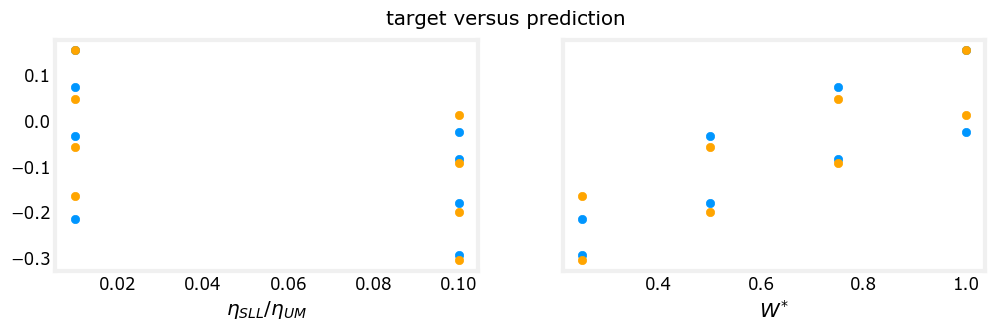

In [7]:
# plot predictions and targets versus original features    
fig,ax=plt.subplots(1,2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],preds,color = ["orange"], label = 'predict')
#ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction")
plt.show()